In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [113]:
df = pd.read_csv('lab1/Data Carrard et al. 2022 MedTeach.csv')
df.shape, list(df.columns)

((886, 20),
 ['id',
  'age',
  'year',
  'sex',
  'glang',
  'part',
  'job',
  'stud_h',
  'health',
  'psyt',
  'jspe',
  'qcae_cog',
  'qcae_aff',
  'amsp',
  'erec_mean',
  'cesd',
  'stai_t',
  'mbi_ex',
  'mbi_cy',
  'mbi_ea'])

In [114]:
df.head()

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23


In [115]:
for cols in df: 
    if type(df[cols][0]) is str: 
        df[cols] = pd.factorize(df[cols])[0]

In [116]:
df = df.dropna()

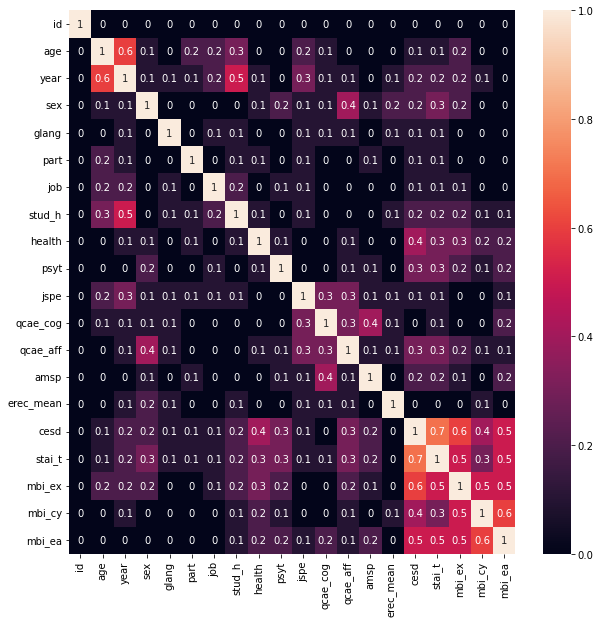

In [131]:
ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(round(abs(df.corr()), 1), annot=True)

In [174]:
train_input, test_input, train_output, test_output = train_test_split(df.drop('psyt', axis=1), df["psyt"], test_size=0.2)

In [175]:
model = GaussianNB() 
model.fit(train_input, train_output)
predictions = model.predict(test_input) 
accuracy = metrics.accuracy_score(predictions, test_output) 
print(f"Точность модели на тестовом участке = {accuracy}")

Точность модели на тестовом участке = 0.7471910112359551
